In [1]:
import torch as t

In [2]:
from torch.autograd import Variable

In [3]:
N, D, H = 3, 4, 5

In [4]:
x = Variable(t.randn(N,D))
w1 = Variable(t.randn(D,H))
w2 = Variable(t.randn(D,H))

In [5]:
z = 10
if z>0:
    y = x.mm(w1)
else:
    y = x.mm(w2)

In [6]:
y

tensor([[-2.8107, -4.9211, -0.7219,  0.5796,  0.4101],
        [-0.0251,  1.1629,  0.8652, -0.3462,  0.7849],
        [ 0.6296,  0.0985,  1.4795, -0.3478, -0.3076]])

In [7]:
x = t.Tensor(5,3)
x

tensor([[0.0000e+00, -0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.5873e-43, 3.6013e-43],
        [3.5873e-43, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1704e-41, 0.0000e+00]])

In [9]:
x = t.rand(5,3)
x

tensor([[0.9250, 0.1277, 0.7093],
        [0.9739, 0.2397, 0.5425],
        [0.2209, 0.7224, 0.1735],
        [0.2622, 0.0156, 0.9201],
        [0.8081, 0.4724, 0.9780]])

In [10]:
print(x.size())

torch.Size([5, 3])


In [13]:
x.size()[0] #行
x.size()[1] #列

3

In [16]:
y = t.rand(5,3)

In [17]:
x+y

tensor([[1.6901, 0.5807, 0.9719],
        [1.0056, 0.7344, 0.5440],
        [0.7846, 0.8498, 0.7809],
        [1.1325, 0.9578, 0.9543],
        [1.4260, 1.3282, 1.1088]])

In [18]:
t.add(x,y)

tensor([[1.6901, 0.5807, 0.9719],
        [1.0056, 0.7344, 0.5440],
        [0.7846, 0.8498, 0.7809],
        [1.1325, 0.9578, 0.9543],
        [1.4260, 1.3282, 1.1088]])

In [19]:
result = t.Tensor(5,3)
t.add(x,y,out=result)
result

tensor([[1.6901, 0.5807, 0.9719],
        [1.0056, 0.7344, 0.5440],
        [0.7846, 0.8498, 0.7809],
        [1.1325, 0.9578, 0.9543],
        [1.4260, 1.3282, 1.1088]])

In [20]:
import numpy as np


In [21]:
a = np.ones(5)
b = t.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


### Tensor和numpy对象共享内存

In [22]:
b.add_(1)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [23]:
a

array([2., 2., 2., 2., 2.])

autograd.Variable 是 Autograd中的核心类，简单封装Tensor并几乎支持Tensor的所有操作。 Variable可以调用.backward实现反向传播自动计算所有梯度

In [25]:
x = Variable(t.ones(2,2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [27]:
y.grad_fn

In [28]:
y.backward() #反向传播计算梯度

In [29]:
x.grad

tensor([[1., 1.],
        [1., 1.]])

grad在反向传播过程中是累加的，所以bp之前要把梯度清零

In [33]:
y.backward()
x.grad

tensor([[5., 5.],
        [5., 5.]])

In [34]:
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [35]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [37]:
x = Variable(t.ones(4,5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
x_tensor_cos

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])


tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

### 定义网络

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #卷积层'1'表示输入图片为单通道,'6'表示输出通道数,'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        #仿射层/全连接层 y=Wx+b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        #卷积->激活->池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        # reshape, -1表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
for name, para in net.named_parameters():
    print(name,' : ',para.size())

conv1.weight  :  torch.Size([6, 1, 5, 5])
conv1.bias  :  torch.Size([6])
conv2.weight  :  torch.Size([16, 6, 5, 5])
conv2.bias  :  torch.Size([16])
fc1.weight  :  torch.Size([120, 400])
fc1.bias  :  torch.Size([120])
fc2.weight  :  torch.Size([84, 120])
fc2.bias  :  torch.Size([84])
fc3.weight  :  torch.Size([10, 84])
fc3.bias  :  torch.Size([10])


In [42]:
input = Variable(t.randn(1,1,32,32))
out = net(input)
out.size()

torch.Size([1, 10])

In [43]:
net.zero_grad()
out.backward(Variable(t.ones(1,10))) #BP

#### 损失函数

In [64]:
output = net(input)
target = Variable(t.arange(0,10).float())
criterion = nn.MSELoss()
loss =criterion(output, target)
loss

/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(28.3000, grad_fn=<MseLossBackward>)

In [65]:
target = Variable(t.arange(0,10))
target.type()

'torch.LongTensor'

In [66]:
#运行backward，观察调用前后的grad
net.zero_grad() #把所有可学习参数的梯度清零
print('反向传播之前conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后conv1.bias的梯度
tensor([ 0.0508,  0.1112, -0.0483,  0.0738,  0.0510,  0.0346])


#### 优化器

In [67]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

#先梯度清零
optimizer.zero_grad()

#计算损失
output = net(input)
loss = criterion(output, target)

#bp
loss.backward()

#更新参数
optimizer.step()


### 数据加载和预处理

In [68]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

show = ToPILImage() # 可以把Tensor转成Image,方便可视化


In [70]:
#定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(), # 转为Tensor
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)), # 归一化
])

#训练集
trainset = tv.datasets.CIFAR10(root='/Users/yanbingong/Desktop/fyp/pytorch/data',
                              train=True,
                              download=True,
                              transform=transform)

trainloader = t.utils.data.DataLoader(trainset,
                                     batch_size=4,
                                     shuffle=True,
                                     num_workers=2)

#测试集
testset = tv.datasets.CIFAR10(root='/Users/yanbingong/Desktop/fyp/pytorch/data',
                             train=False,
                             download=True,
                             transform=transform)

testloader = t.utils.data.DataLoader(trainset,
                                    batch_size=4,
                                    shuffle=False,
                                    num_workers=2)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')



Files already downloaded and verified
Files already downloaded and verified


ship


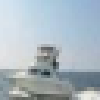

In [74]:
(data, label) = trainset[100]
print(classes[label])

# (data+1)/2 是为了还原被normalize的数据
show((data+1)/2).resize((100,100))

plane dog frog cat


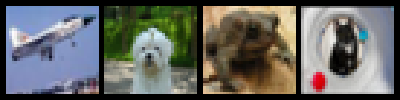

In [81]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(' '.join(classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

### 一个完整的网络

In [82]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #卷积层'1'表示输入图片为单通道,'6'表示输出通道数,'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        #仿射层/全连接层 y=Wx+b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        #卷积->激活->池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        # reshape, -1表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [83]:
#定义loss fucntion and optimizer
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [87]:
#train net

for epoch in range(10):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs) # forward
        loss = criterion(outputs, labels)
        loss.backward()
        
        #update paras
        optimizer.step()
        
        #print logs
        running_loss += loss.item()
        if i%2000==1999: # 2000batch打印一次状态
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
        
print('Finish Training')
            
            

[1,  2000] loss: 2.210
[1,  4000] loss: 1.895
[1,  6000] loss: 1.695
[1,  8000] loss: 1.591
[1, 10000] loss: 1.524
[1, 12000] loss: 1.442
Finish Training
[2,  2000] loss: 1.389
[2,  4000] loss: 1.370
[2,  6000] loss: 1.337
[2,  8000] loss: 1.344
[2, 10000] loss: 1.291
[2, 12000] loss: 1.263
Finish Training
[3,  2000] loss: 1.223
[3,  4000] loss: 1.205
[3,  6000] loss: 1.195
[3,  8000] loss: 1.197
[3, 10000] loss: 1.175
[3, 12000] loss: 1.168
Finish Training
[4,  2000] loss: 1.083
[4,  4000] loss: 1.064
[4,  6000] loss: 1.102
[4,  8000] loss: 1.093
[4, 10000] loss: 1.087
[4, 12000] loss: 1.083
Finish Training
[5,  2000] loss: 1.007
[5,  4000] loss: 1.011
[5,  6000] loss: 1.009
[5,  8000] loss: 1.017
[5, 10000] loss: 1.010
[5, 12000] loss: 1.016
Finish Training
[6,  2000] loss: 0.915
[6,  4000] loss: 0.955
[6,  6000] loss: 0.939
[6,  8000] loss: 0.978
[6, 10000] loss: 0.960
[6, 12000] loss: 0.979
Finish Training
[7,  2000] loss: 0.876
[7,  4000] loss: 0.892
[7,  6000] loss: 0.897
[7,  80

In [91]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('实际的label: ',' ', ' '.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images/2 - 0.5)).resize((400,100))

#计算在每个类别上的分数
outputs = net(Variable(images))
#得分最高的:
_, predicted = t.max(outputs.data, 1)

print('预测结果: ', ' ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))



实际的label:        frog    truck    truck     deer
预测结果:     frog truck truck  deer


In [92]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _,predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels).sum()
    
print('%f %%'%(100*correct/total))

73.000000 %
